In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import pathlib

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

tf.__version__

'2.3.1'

# Data

## Load data

**data is structured as:**   
   
       ../data/
            multiclass_200/
                train/
                    Aloe_Vera/
                        Aloe_Vera_1.jpeg
                        Aloe_Vera_2.jpeg
                        ...
                    ...
                    Umbrella_Tree/
                        Umbrella_Tree_1.jpeg
                        Umbrella_Tree_2.jpeg
                        ...
                test/
                    Aloe_Vera/
                        Aloe_Vera_1.jpeg
                        Aloe_Vera_2.jpeg
                        ...
                    ...
                    Umbrella_Tree/
                        Umbrella_Tree_1.jpeg
                        Umbrella_Tree_2.jpeg
                        ...
                val/
                    Aloe_Vera/
                        Aloe_Vera_1.jpeg
                        Aloe_Vera_2.jpeg
                        ...
                    ...
                    Umbrella_Tree/
                        Umbrella_Tree_1.jpeg
                        Umbrella_Tree_2.jpeg
                        ...
            House_Plants.csv
    
    
**split-folders (pip install split-folders) can be used to help with train/test/val splitting**

In [3]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  '../data/multiclass_200/',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

NameError: name 'img_height' is not defined

In [4]:
data_path = '../data/multiclass_200'
batch_size = 32
img_height = 180
img_width = 180

# create a data generator
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
                                        rotation_range=180, # rotate up to 180 degrees
                                        width_shift_range=0.1, # shift laterally <20%
                                        height_shift_range=0.1, # shift vertically <20%
                                        shear_range=0.1, # shear <10%
                                        zoom_range=0.1, # zoom in and out <20%
                                        horizontal_flip=True, # random horizontal flips
                                        fill_mode='nearest', # fill space smoothly
                                        brightness_range=[0.5, 1.5] # scaling range
)

# load and iterate training dataset
train_it = datagen.flow_from_directory(f'{data_path}/train/',
                                       class_mode='binary',
                                       batch_size=batch_size)

# load and iterate validation dataset
val_it = datagen.flow_from_directory(f'{data_path}/val/',
                                     class_mode='binary',
                                     batch_size=batch_size)

# load and iterate test dataset
test_it = datagen.flow_from_directory(f'{data_path}/test/',
                                      class_mode='binary',
                                      batch_size=batch_size)

Found 2240 images belonging to 16 classes.
Found 640 images belonging to 16 classes.
Found 320 images belonging to 16 classes.


## Visualize pre-processed dataset

/opt/miniconda3/envs/PlantPal/lib/python3.7/site-packages/PIL/Image.py:961: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/opt/miniconda3/envs/PlantPal/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:785: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


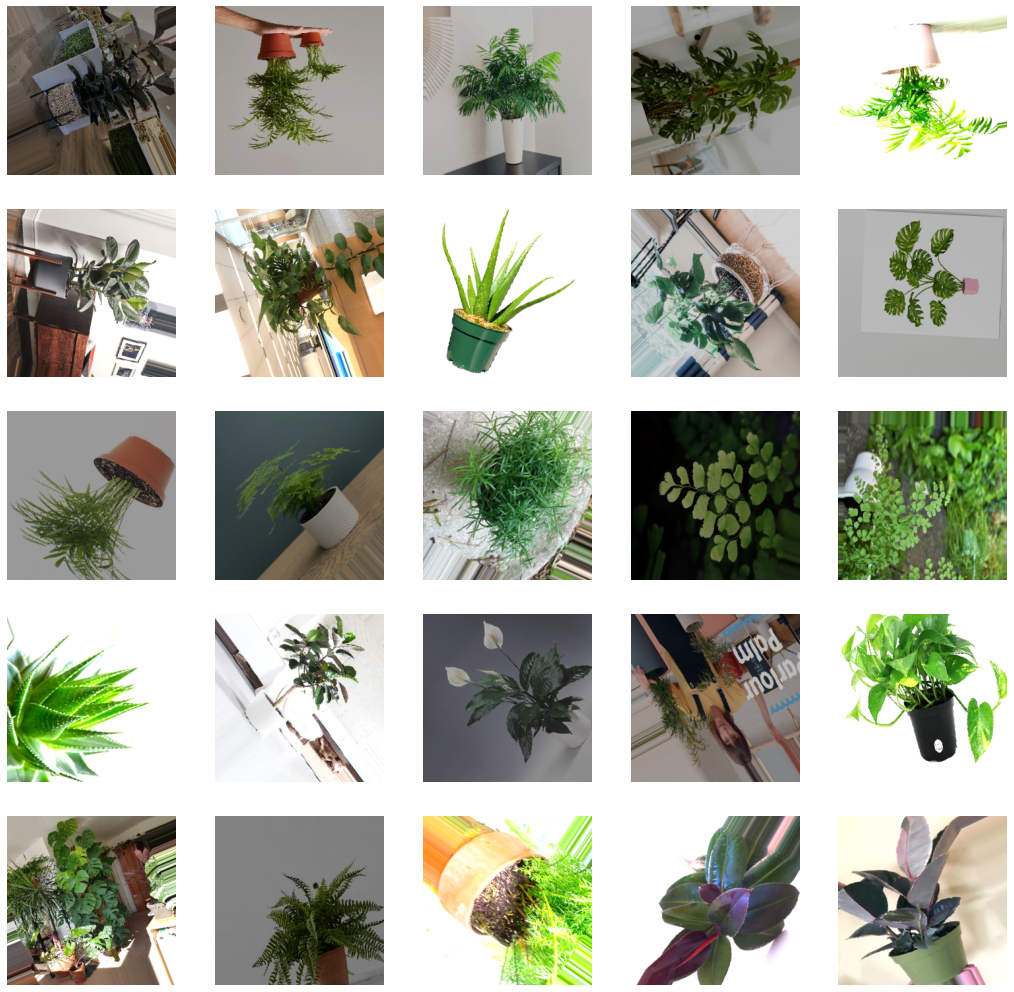

In [5]:
# generate samples and plot
fig, ax = plt.subplots(nrows=5, ncols=5, figsize=(18,18))

# generate batch of images
for row in range(5):
    for col in range(5):
        
        # convert to unsigned integers
        image = next(train_it)[0][0].astype('uint8')

        # plot image
        ax[row, col].imshow(image)
        ax[row, col].axis('off')

**Print data classes and associated indeces:**

In [8]:
train_it.class_indices

{'Aloe_Vera': 0,
 'Asparagus_Fern': 1,
 'Baby_Rubber_Plant': 2,
 'Boston_Fern': 3,
 'Fiddle_Leaf_Fig': 4,
 'Golden_Pothos': 5,
 'Jade_Plant': 6,
 'Maidenhair_Fern': 7,
 'Monstera': 8,
 'Parlor_Palm': 9,
 'Peace_Lily': 10,
 'Pothos': 11,
 'Rubber_Plant': 12,
 'Snake_Plant': 13,
 'Spider_Plant': 14,
 'Umbrella_Tree': 15}

In [9]:
batchX, batchy = train_it.next()

In [10]:
np.shape(batchX)

(32, 256, 256, 3)

In [8]:
batchy[0]

7.0

Normalize the RGB values from 0-255 to be 0-1, which is faster for NNs to train with.

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

## Normalize data and rescale

# Build model

# Train model

In [10]:
# or use iterator from .flow_from_directory()
model.fit_generator(train_generator, 
                    epochs=epochs,  # one forward/backward pass of training data
                    steps_per_epoch=x_train.shape[0]//batch_size,  # number of images comprising of one epoch
                    validation_data=(x_test, y_test), # Or validation_data=valid_generator
                    validation_steps=x_test.shape[0]//batch_size)

model.fit_generator(train_it, 
                    steps_per_epoch=16, 
                    validation_data=val_it, 
                    validation_steps=8)

NameError: name 'model' is not defined